In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, h5py

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(cities)

['BARCELONA', 'MOSCOW', 'ANTWERP', 'BANGKOK']


In [2]:
def load_h5_file(filename):
    with h5py.File(filename) as fr:
        return np.array(fr.get("array"))

In [3]:
channels = [(0, 'volume_NE'), (1, 'speed_NE'), (2, 'volume_NW'), (3, 'speed_NW'), (4, 'volume_SE'), (5, 'speed_SE'), (6, 'volume_SW'), (7, 'speed_SW'), (8, 'incidents')]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './raw/BARCELONA/training/2019-04-03_BARCELONA_8ch.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

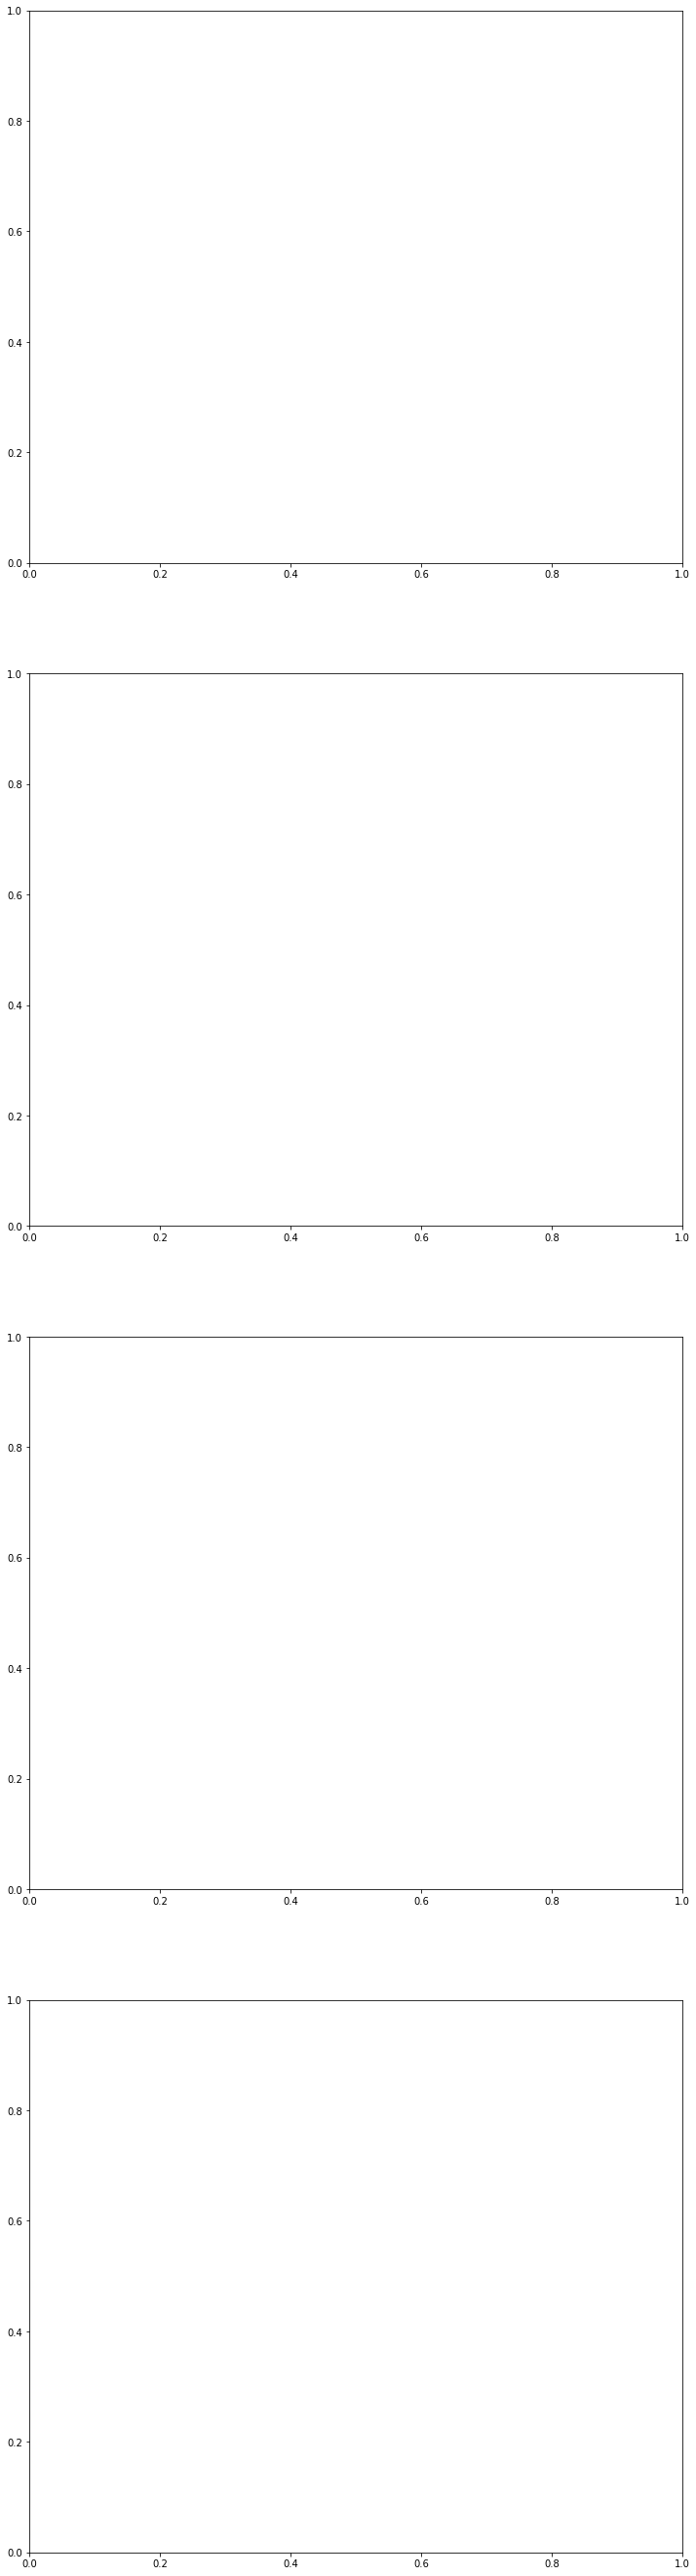

In [4]:
rows = len(cities)
cols = 1
scale_factor = 12
fig, axs = plt.subplots(rows, cols, figsize=(cols * scale_factor, rows * scale_factor))

for i, city in enumerate(cities):
    third_apr = load_h5_file(f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch.h5")
    map_at_noon = third_apr[143].sum(axis=(-1))
    axs[i].imshow(map_at_noon[0:495, 0:436], cmap="gray", vmin=0, vmax=255)

In [ ]:
import datetime
rows = len(cities)
for city in cities:
    third_apr = load_h5_file(f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch.h5")
    print(f"Loaded data has shape {third_apr.shape} with dtype {third_apr.dtype} between {np.min(third_apr)} and {np.max(third_apr)}")

    dailysum = np.sum(third_apr, axis=(0))
    unravelled = np.unravel_index([np.argmax(dailysum[:, :, 1])], (495, 436))
    x = unravelled[0][0]
    y = unravelled[1][0]
    print(f"Reading pixel {x},{y}")

    for ch in range(third_apr.shape[3]):
        plt.figure(figsize=(50, 10))
        plt.title(f"channel {channels[ch]} at ({x},{y})")
        x_labels = [datetime.time(hour=t // 12, minute=t % 12 * 5).isoformat(timespec="minutes") for t in range(288)]
        plt.plot(x_labels, third_apr[:, x, y, ch], linewidth=6)
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
import datetime
from typing import List

def generate_date_range(from_date: str, to_date: str) -> List[str]:
    start = datetime.datetime.strptime(from_date, "%Y-%m-%d")
    end = datetime.datetime.strptime(to_date, "%Y-%m-%d")
    date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end - start).days + 1)]

    all_dates = [date.strftime("%Y-%m-%d") for date in date_generated]
    return all_dates


def weekday_parser(date: str) -> int:
    weekday_ix = datetime.datetime.strptime(date, "%Y-%m-%d").weekday()
    return weekday_ix


pre_covid_range = generate_date_range("2019-04-01", "2019-05-30")
in_covid_range = generate_date_range("2020-04-01", "2020-05-30")
list(enumerate(channels))
volume_channels = [0, 2, 4, 6]

In [ ]:
pre_covid_range,in_covid_range

In [ ]:
def get_traffic_volume():
    return ...

In [ ]:

fig, axs = plt.subplots(len(cities), 1, figsize=(scale_factor * 10, len(cities) * scale_factor))

for i, city in enumerate(cities):
    axs[i].set_title(f"{city} sum over all volume channels {[channels[ch] for ch in volume_channel_indices]}")
    axs[i].barh(
        [f"{pre_covid_range[0]} - {pre_covid_range[-1]}", f"{in_covid_range[0]} - {in_covid_range[-1]}"],
        [np.sum(get_traffic_volume[city]), np.sum(get_traffic_volume[city])],
    )
    axs[i].invert_yaxis()